In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('fitness_data.csv')

# Check for missing data and basic statistics
print(df.describe())
print(df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df = pd.get_dummies(df, columns=['Activity Level', 'Location'], drop_first=True)


            UserID         Age  App Sessions  Distance Traveled (km)  \
count   500.000000  500.000000    500.000000              500.000000   
mean   1250.500000   39.822000     94.678000               51.432000   
std     144.481833   12.080488     37.669089               30.873704   
min    1001.000000   20.000000     30.000000                7.400000   
25%    1125.750000   29.000000     55.750000               23.400000   
50%    1250.500000   41.000000     96.000000               47.700000   
75%    1375.250000   50.000000    113.250000               64.075000   
max    1500.000000   60.000000    182.000000              178.500000   

       Calories Burned   Retention  
count        500.00000  500.000000  
mean         512.84600    0.642000  
std          309.82459    0.479892  
min           76.00000    0.000000  
25%          235.50000    0.000000  
50%          480.50000    1.000000  
75%          637.25000    1.000000  
max         1745.00000    1.000000  
UserID            

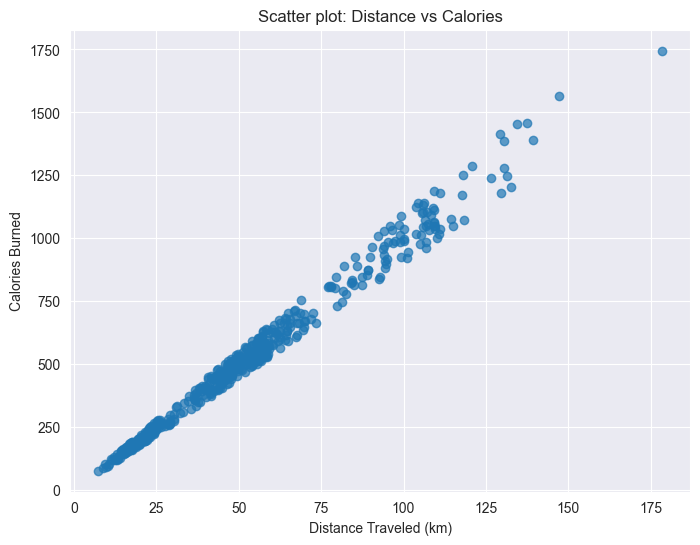

In [2]:
# Exploratory data analysis with matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Distance vs Calories
plt.figure(figsize=(8,6))
plt.scatter(df['Distance Traveled (km)'], df['Calories Burned'], alpha=0.7)
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Calories Burned')
plt.title('Scatter plot: Distance vs Calories')
plt.savefig('distances_calories_scatter.png')


In [3]:
# Regression analysis predicting calories burned
import statsmodels.api as sm
from sklearn.metrics import r2_score

X = df[['Age', 'Gender', 'App Sessions', 'Activity Level_Moderate', 'Activity Level_Active']]
y = df['Calories Burned']

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

print(model.summary())

# Prediction and visualization
y_pred = model.predict(X_const)

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs Predicted Calories')
plt.savefig('regression_fit.png')

KeyError: "['Activity Level_Active'] not in index"